In [1]:
import h5py
import numpy as np
import sys, os



# era sst

import xarray as xr
import numpy as np
import pandas as pd

import netCDF4
from matplotlib import pyplot as plt
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from datetime import datetime
import matplotlib
from matplotlib import cm
import matplotlib.ticker as mticker
import cmocean
import cartopy.crs as ccrs
import cartopy.feature as cfeature





import boto3
from botocore.handlers import disable_signing


# using shapefile


import cartopy.crs as ccrs
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt


# reader = shpreader.Reader('./texas_state.shp')
# counties = list(reader.geometries())
# COUNTIES = cfeature.ShapelyFeature(counties, ccrs.PlateCarree())



import fsspec
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
from metpy.plots import USCOUNTIES
import tqdm
# import nexradaws
# import pytz


import botocore




# from matplotlib import animation
import matplotlib.animation
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams["animation.html"] = "jshtml"
plt.rcParams['figure.dpi'] = 200  
plt.ioff()
plt.rcParams['animation.ffmpeg_path'] = '/scratch/gilbreth/wwtung/FourCastNet_ani/'

In [2]:
inference_with_oos = "/scratch/gilbreth/wwtung/ERA5_expts_2013_oosrun"
inference_without = "/scratch/gilbreth/wwtung/ERA5_expts_2013"

In [3]:
# plotting real and predicted for 2013 with oos
output_list = []

directory= inference_with_oos
output_frame = 12
seq_real = f"{directory}/seq_real_output_{output_frame}.npy"
seq_pred = f"{directory}/seq_pred_output_{output_frame}.npy"



with open( seq_real , 'rb') as f:
    a = np.load(f)
    output_list.append(a)

with open(seq_pred, 'rb') as f:
    b = np.load(f)
    output_list.append(b)

print(f" shape: {output_list[0].shape} ")




# fig, ax = plt.subplots(3, 1, figsize=(24,12))

# # # create axis using cartopy projections, add in coastlines & grid
# # ax = fig.add_subplot(1,1,1,projection=ccrs.PlateCarree(central_longitude=260))


# ax[0].imshow(pred, cmap="coolwarm" )
# # ax[0].add_feature(cfeature.COASTLINE, linewidth=0.5, color='black', zorder=2)
# # ax[0].grid(visible=True)
# ax[0].set_title(f"predicted_{fld}")

# ax[1].imshow(real, cmap="coolwarm")
# ax[1].set_title(f"real_{fld}")


# ax[2].imshow(abs(pred-real), cmap="coolwarm")
# ax[2].set_title(f"diff_pred_real_{fld}")

# fig.tight_layout()


# plt.savefig(f"./comparing_results_inference_{output_frame}_{fld}.png", dpi = 200)


 shape: (41, 20, 720, 1440) 


In [4]:
idx = 7
fld = "tcwv"
channel_tags = {"u10": 0, "z500": 14, "2m_temperature": 2, "v10": 1, "t850": 5, "tcwv": 19}
channel=channel_tags[fld]





real = output_list[0][idx,channel]
pred = output_list[1][idx,channel]

print(f" pred_shape: {pred.shape}, real_shape: {real.shape}")

 pred_shape: (720, 1440), real_shape: (720, 1440)


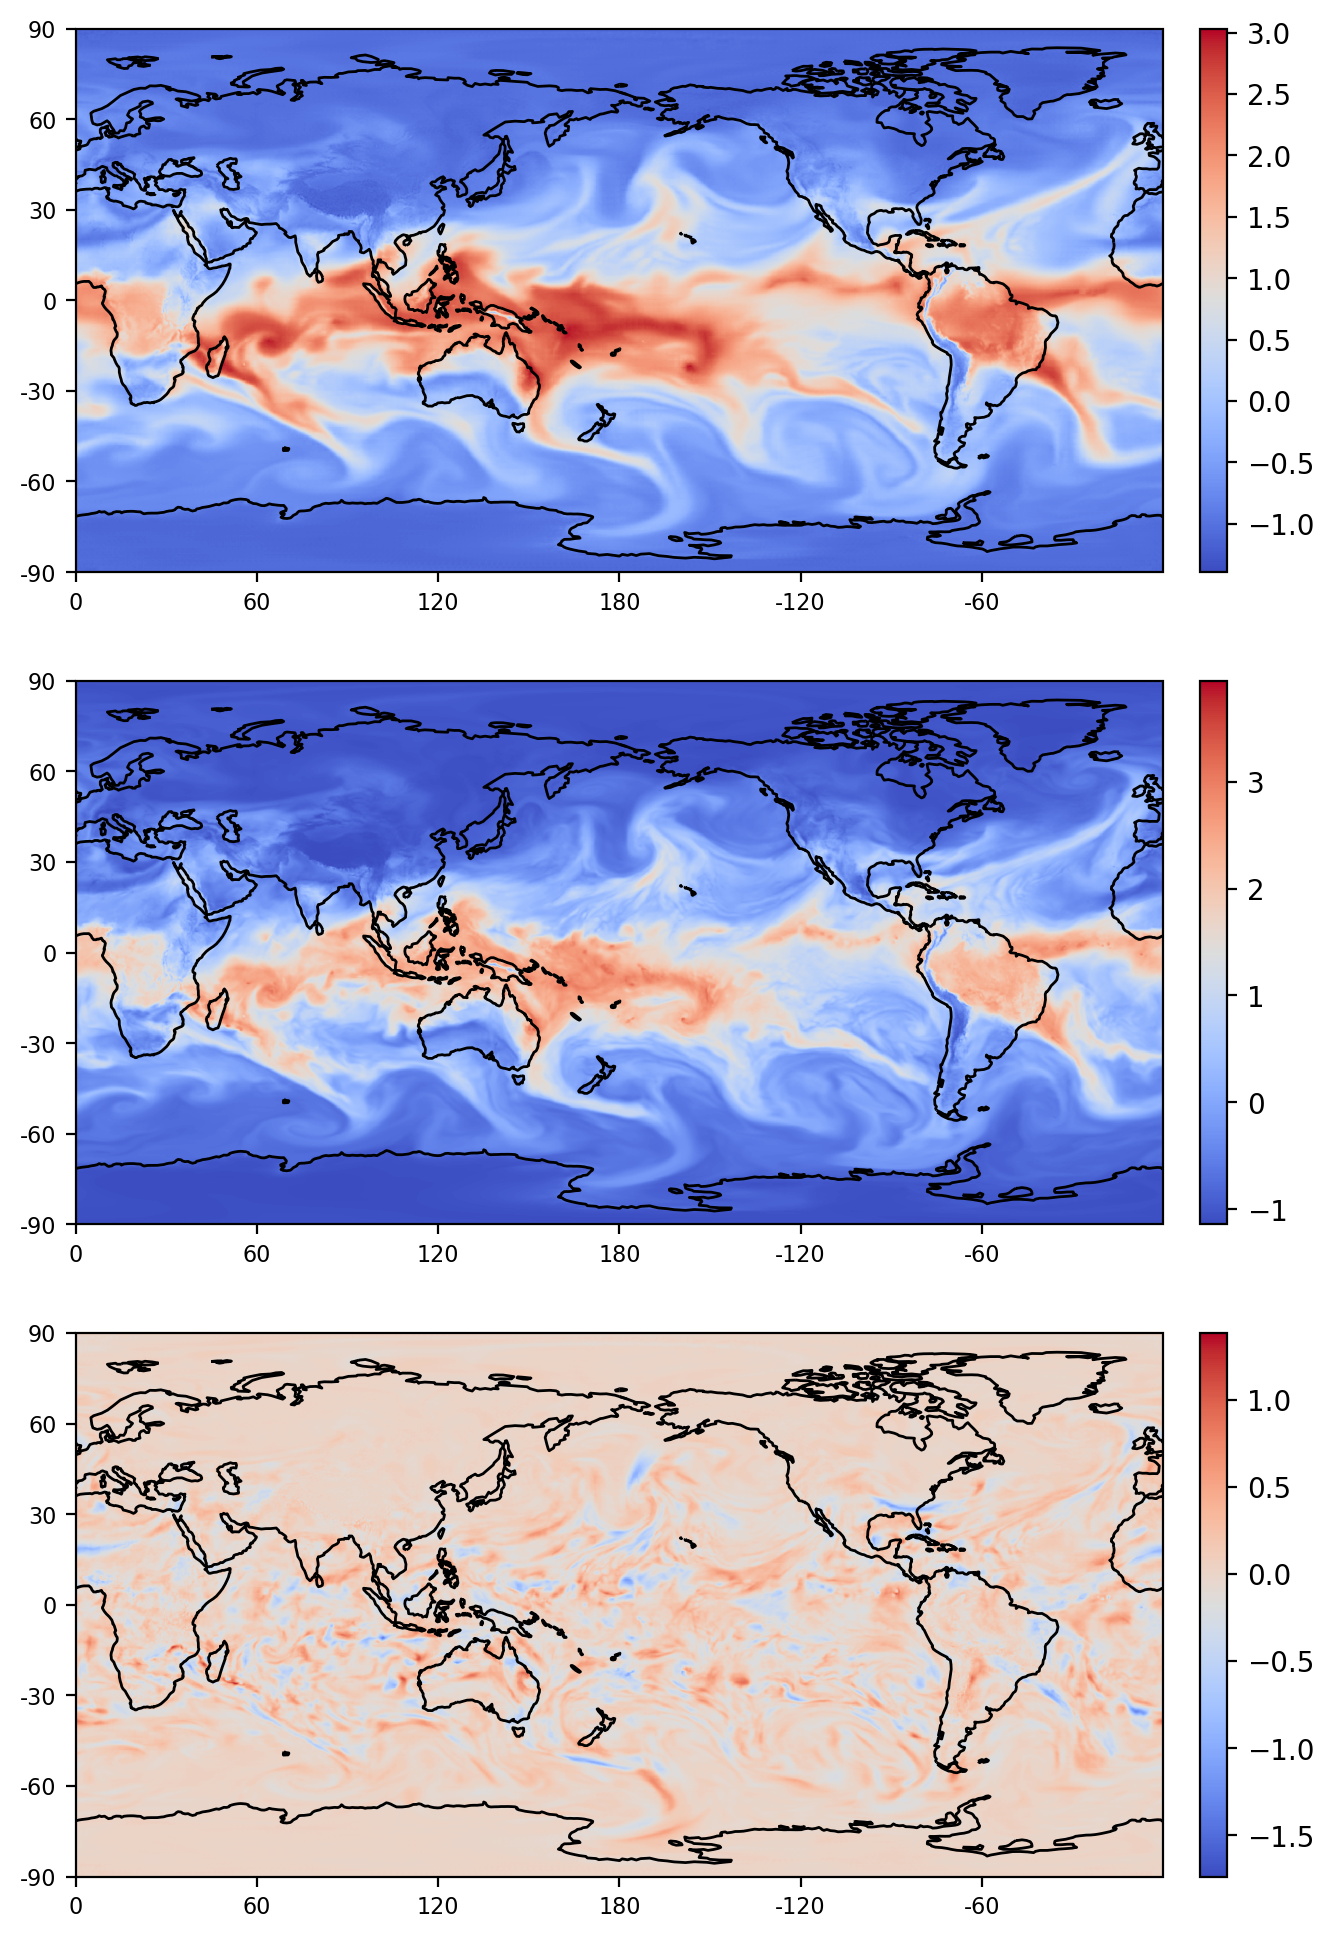

In [5]:
data = [pred, real, (pred-real) ]


# Create subplots
fig, axs = plt.subplots(3, 1, subplot_kw={'projection': ccrs.PlateCarree(central_longitude=180)}, figsize=(24,12))


# Plot the data
for i in range(3):
    ax = axs[i]
    ax.coastlines()
    out = ax.imshow(data[i], cmap="coolwarm", origin='upper', extent=[0, 360,-90, 90],  transform=ccrs.PlateCarree())
    # ax.set_extent([minlon, maxlon, -45, 45], ccrs.PlateCarree())
    # ax.gridlines(draw_labels=True, crs=proj)
    ax.set_xticks([0, 60, 120, 180, 240, 300], crs=ccrs.PlateCarree())
    ax.set_xticklabels([0, 60, 120, 180, -120, -60], fontsize=8)

    ax.set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
    ax.set_yticklabels([-90, -60, -30, 0, 30, 60, 90], fontsize=8)

    fig.colorbar(out,orientation="vertical", pad=0.01, ax=ax)
    # ax.set_title(f"{str(data[i])} {fld}")
    # ax.contourf(lons, lats, sst, 60,
    # transform=ccrs.PlateCarree(central_longitude=180))


# Display the plot
# fig.tight_layout()
plt.show()
# plt.savefig('figures.png')

In [ ]:


import geopandas as gpd
import rasterio
from rasterio.mask import mask

# Load the geographical data of the US
us = gpd.read_file('us_boundary.shp')

# Load the ECMWF dataset
with rasterio.open('your_file.h5') as src:
   out_image, out_transform = mask(src, us.geometry, crop=True)
   out_meta = src.meta

# Save the cropped data to a new HDF5 file
with rasterio.open('cropped_us.h5', 'w', **out_meta) as dest:
   dest.write(out_image)